In [88]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

# Исследование данных

#### Загрузка данных

In [89]:
# load the data
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/submission.csv')

# Check random row
random_number_train = np.random.randint(data_train.shape[0])
random_number_test = np.random.randint(data_test.shape[0])
#print(data_train.iloc[random_number_train])
#print(data_test.iloc[random_number_test])

# Select target
y_train = data_train.Churn
y_test = submission

# Select features
X_train = data_train.drop('Churn', axis=1)
X_test = data_test

#Check missing values
#X_train.info()
#X_test.info()

cols_with_missing_X_train = [col for col in X_train
                     if X_train[col].isnull().any() or (X_train[col] == ' ').any()]
cols_with_missing_X_test = [col for col in X_test
                     if X_test[col].isnull().any() or (X_test[col] == ' ').any()]
#print('Cols with missing values in X_train:', cols_with_missing_X_train)
#print('Cols with missing values in X_test:', cols_with_missing_X_test)

# Imputation
def to_float_TotalSpent(data: pd.DataFrame) -> pd.DataFrame:
    """
    Get DataFrame and converts the TotalSpent column to float 
    empty values = np.nan
    """
    for i, val in enumerate(data.TotalSpent):
        if val == ' ':
            data.TotalSpent.iloc[i] = np.nan
    data = data.astype({'TotalSpent': 'float64'})
    return data

X_train = to_float_TotalSpent(X_train)
X_test = to_float_TotalSpent(X_test)

#print(X_train[X_train['TotalSpent'].isna()])
print(X_train.isna().sum())

TotalSpent_X_train = np.array(X_train.TotalSpent).reshape(-1, 1)
TotalSpent_X_test = np.array(X_test.TotalSpent).reshape(-1, 1)

my_imputer = SimpleImputer()
imputed_TotalSpent_X_train = pd.DataFrame(my_imputer.fit_transform(TotalSpent_X_train))
imputed_TotalSpent_X_test = pd.DataFrame(my_imputer.transform(TotalSpent_X_test))

# Imputation removed column names: put the back and add in main DataFrame
imputed_TotalSpent_X_train.columns = ['TotalSpent']
imputed_TotalSpent_X_test.columns = ['TotalSpent']
X_train.TotalSpent = imputed_TotalSpent_X_train
X_test.TotalSpent = imputed_TotalSpent_X_test

# Find numerical and categorical columns
numerical_columns = [col for col in X_train
                     if X_train[col].dtypes in ['int64', 'float64']]
numerical_columns.remove('IsSeniorCitizen')
categorical_columns = [col for col in X_train
                       if X_train[col].dtypes == 'object']
categorical_columns.append('IsSeniorCitizen')

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64


#### Анализ данных

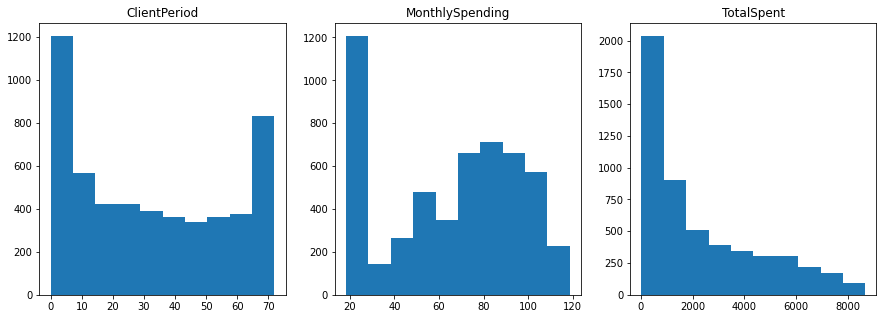

In [115]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

ax = ax.ravel()

for i, column in enumerate(numerical_columns):
    ax[i].set_title(column)
    ax[i].hist(X_train[column])
    
fig.show()

#### Я попробовал проанализировать графики и думаю дела обстоят так:
##### График ClientPeriod - думаю, эта калонка показывает сколько дней клиент пользуется услугами компании. Диапазон баров ~ 5. Получается у компании много новичков, которые держатся до 5 дней, после 5 дней примерно половина клиентов отключаются. Потеря клиентов идет до ~ 45-50 дней, после этого клиенты ,как правило, остаются.
##### График  MonthlySpending - Ежемесячные расходы. диапазон баров

